# 0. **Авторство**  
"Работа выполнена ФИО совместно с ФИО. Подписываемся, что это не плагиат, работа выполнена нами самостоятельно, каждый из нас внес свой вклад в работу"

# 1. **Подготовка данных**

## 1.1 **О данных**  

**OVERVIEW**  
Contains 34,686,770 Amazon reviews from 6,643,669 users on 2,441,053 products, from the Stanford Network Analysis Project (SNAP). This subset contains 1,800,000 training samples and 200,000 testing samples in each polarity sentiment.  
  
**You will work only with the part of training data**.  

**ORIGIN**    
The Amazon reviews dataset consists of reviews from amazon. The data span a period of 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review. For more information, please refer to the following paper: J. McAuley and J. Leskovec. Hidden factors and hidden topics: understanding rating dimensions with review text. RecSys, 2013.

**DESCRIPTION**  
The Amazon reviews polarity dataset is constructed by taking review score 1 and 2 as negative, and 4 and 5 as positive. Samples of score 3 is ignored. In the dataset, class 1 is the negative and class 2 is the positive.
  
The CSVs contain polarity, title, text. These 3 columns in them, correspond to class index (1 or 2), review title and review text.
  
**polarity** - 1 for negative and 2 for positive  
**title** - review heading  
**text** - review body    
  
The review title and text are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

## 1.2 **Загрузка данных**  

In [5]:
!pip install opendatasets

In [6]:
import opendatasets as od
import pandas as pd
import numpy as np
import tarfile

Чтобы код ниже сработал, вам нужно выполнить следующее:  
1. Зарегистрируйтесь на https://www.kaggle.com/  
2. После регистрации, кликните на свой профиль (правый верхний угол, картинка с гусём)  
3. Кликните на Settings  
4. Пролистайте вниз и на вкладке API, кликните Create New Token. К вам на компьютер скачается .json с вашим никнеймом и ключом.  
5. Откройте этот файл и скопируйте ваши username и key в строки ниже.   
  
Полный туториал (на всякий случай) [здесь](https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/).  

In [7]:
od.download(
    "https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews/data?select=train.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: artemmikulinsky
Your Kaggle Key: ··········


100%|██████████| 1.29G/1.29G [00:15<00:00, 91.6MB/s]


In [8]:
train_df = pd.read_csv('/content/amazon-reviews/train.csv', header=None)
print(train_df.head())

   0                                                  1  \
0  2                     Stuning even for the non-gamer   
1  2              The best soundtrack ever to anything.   
2  2                                           Amazing!   
3  2                               Excellent Soundtrack   
4  2  Remember, Pull Your Jaw Off The Floor After He...   

                                                   2  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  


Ничего здесь не меняйте.

In [9]:
data = train_df.sample(frac=0.003, random_state=30)

In [10]:
data.shape

(10800, 3)

In [11]:
data[0].value_counts()

0
1    5457
2    5343
Name: count, dtype: int64

In [12]:
data = data.reset_index().drop('index', axis=1)

In [13]:
data.rename(columns={0: 'label', 1: 'title', 2: 'review'}, inplace=True)

In [14]:
data.head()

,label,title,review
0,1,JUST PLAIN DISAPPOINTED,... I WAS PLAIN AS TO WHY I WAS DISAPPOINTED W...
1,2,Great songs and fun product,This is a fun product and highlights some basi...
2,1,Unbelievably DUMB story`,This is the first time I have read an MC Beato...
3,2,For every woman,Mary Foley has managed to beautifully put into...
4,2,Fun and easy read,This series and author were recommended by a f...


# **Задания (max 11.5 баллов)**   
(в идеале можно получить 11.5 баллов, но в таком случае все равно ставится 10).

## 2. **Предобработка (max 3 балла)**

#### **2.1. Очистка данных (0.5 балла)**

Проверьте, есть ли в колонках title и review "грязные" тексты, нечитаемые символы, html разметка и т.п. При необходимости, произведите очистку текстов. Не трогайте пунктуацию и лексемы.   
  
Возможно, в дальнейшем (уже после выполнения остальных разделов) вам придется вернуться сюда, чтобы повторить очистку.  

In [ ]:
data_to_clean = data.copy()

In [ ]:
# code

#### **2.2. Препроцессинг (2 балла)**

Предобработайте тексты:  
1. Осуществите **токенизацию** текста.  
2. Удалите (отфильтруйте) **стоп-слова** и **пунктуацию**. Желательно проведение дополнительного анализа, например, через частотные распределения для выявления специфичных для корпуса стоп-слов (готовые списки не отражают всего объема, однако вы можете дополнительно нагуглить более свежие списки стоп-слов для английского языка).  
3. Осуществите **лемматизацию** текста.  
  
Допускается использование **любых** инструментов.
   
Предобработка должна выполняться с помощью **функции** и код должен быть вам **понятен**. В связи с чем:  
- Код без функции - 50% от баллов за данный пункт (при условии, что все работает).  
- Больше половины строк кода должны сопровождаться вашими комментариями (#comment). Для примера - смотрите функцию по предобработке текста в ноутбуке из семинара. Отсутствие комментариев - 50% от баллов за данный пункт (при условии, что все работает).   
- **Постарайтесь целиком не копировать функцию из семинарского ноутбука**. Однако вы можете опираться на данную функцию при создании своей (например, заимствовать логику, но использовать вместо spaCy любую [другую библиотеку](https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/), или же взять spaCy, но попробовать написать код самостоятельно, поменяв логику и т.п.).  
  
**Функция**:  
Вход: итерируемый объект (Series или list) с текстами (string).  
Выход: список из списков, где каждый список содержит леммы слов в текстах.  
  
Примените функцию отдельно к заголовкам и текстам ревью, а затем поместите их  в копию pandas dataframe вместо колонок title и review. Набор ``data`` должен остаться без изменений.  

In [1]:
def preprocess_eng_texts(texts):
  '''
  Description
  '''
  pass

In [ ]:
# data_prep_title = preprocess_eng_texts(data['title'])
# data_prep_review = preprocess_eng_texts(data['review'])

In [4]:
# assert type(data_prep_title) == lst
# assert type(data_prep_review) == lst

In [ ]:
# data_lem = data.copy()

# data_lem['title'] = data_prep_title
# data_lem['review'] = data_prep_review

#### **2.3. Разбиение и создание двух наборов (0.5 балла)**   
  
Создайте новый набор данных ``merged`` на основе ``data``: присоедините title к тексту review (в начало текста, через пустой пробел), чтобы вместо двух текстовых признаков у вас остался один (признак назовите ``title_review``). Набор ``data`` должен остаться без изменений.  
  
Используя train_test_split, разбейте оба датасета (``data`` и ``merged``) на 2 выборки - train и validation. Долю валидации возьмите 0.25. Не забудьте про стратификацию. **Обязательно используйте общий random_state, чтобы разбиения получились одинаковыми**.  

Суммарно у вас должно получиться 4 набора данных (``train_data, val_data, train_merged, val_merged``) и 2 набора меток (``y_train, y_val``).  

Не стесняйтесь [гуглить](https://saturncloud.io/blog/how-to-combine-two-columns-in-a-pandas-dataframe/).

In [ ]:
# создание набора merged

In [ ]:
from sklearn.model_selection import train_test_split

# разбиение

## 3. **Информационный поиск (max 3.5 балла)**

#### **3.1. Матрица "document-term" (0.5 балла)**  
На семинаре, когда мы превращали наши тексты в "мешок слов", создавалась матрица "документ-слово" (document-term). Данную матрицу можно также представить как словарь вида ``{номер_документа: [лемма, лемма, лемма ...], номер_документа: [лемма, лемма, лемма ...]}``.  
Создайте такой словарь ```doc_term``` на основе набора данных ```train_merged```. Для этого просто поместите индексы строк в ключи словаря, а значения признака ``title_review`` - в значения.  
Номера документов должны соответствовать индексам строк в ``train_merged``!!! (чтобы можно было получить текст по индексу).  
Можете использовать код из семинарского ноутбука с генератором словаря (если найдете :).  

In [ ]:
# ваш код (не функция)

In [ ]:
# assert type(doc_term) == dict

#### **3.2. Создание inverted index matrix (1 балл)**

  
При информационном поиске document-term матрица может быть не очень удобной, поэтому в некоторых случаях вместо нее используют inverted index. Выглядит она следующим образом:  

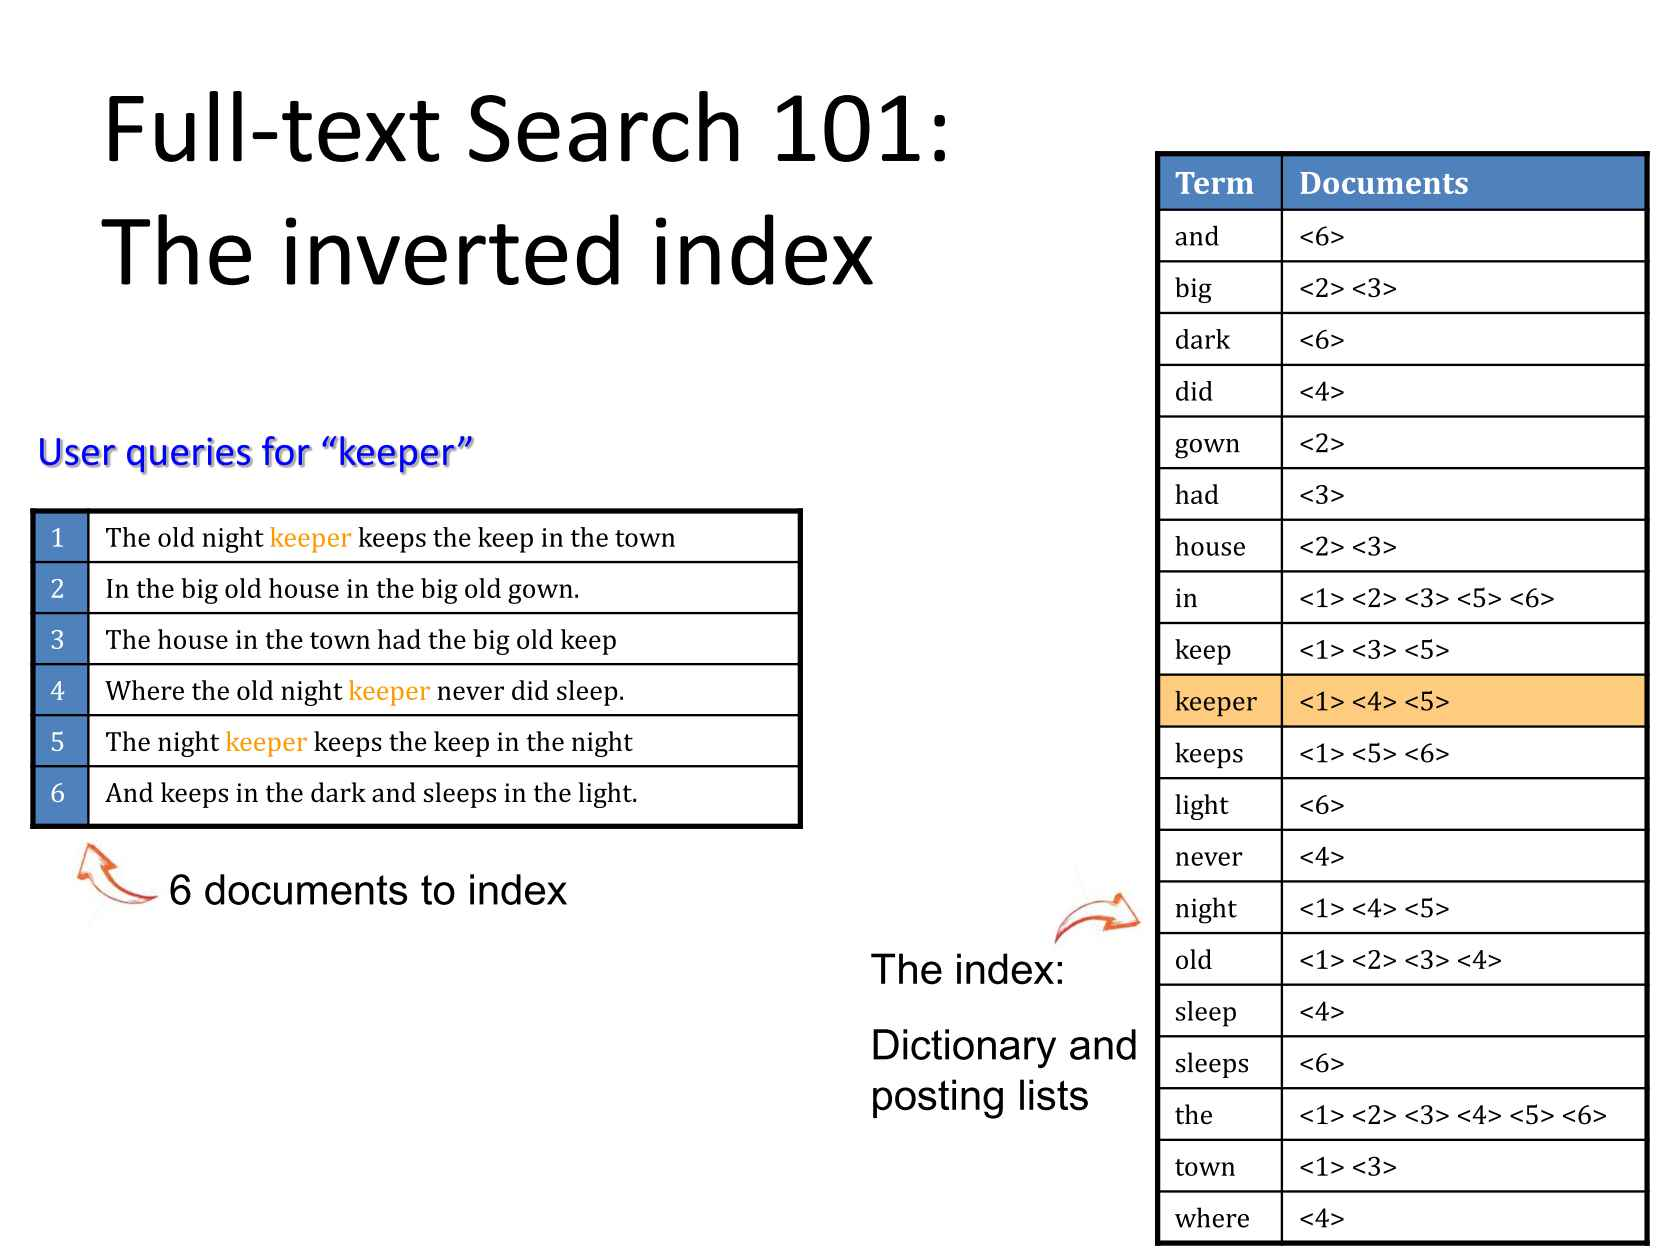

Напишите функцию для создания inverted index matrix на основе текстовых данных из набора ``train_merged`` или ``doc-term`` матрицы.  
Inv index матрица должна быть представлена словарем (``dict``), где ключи представляют собой леммы (``string``), а значения - списки с номерами отзывов (документов из тренировочного набора), в которых данная лемма встретилась (``list`` и ``integer``).    
  
Номера документов должны соответствовать индексам строк в ``train_merged``!!! (чтобы можно было получить текст по индексу).  
  
Комментарии к коду обязательны.  

In [ ]:
def create_inv_index(data):
  '''
  Description
  '''
  pass

In [ ]:
# inv_index = create_inv_index(train_merged)

In [ ]:
# assert type(inv_index) == dict

#### **3.3. Простейший алгоритм информационного поиска (1 балл)**

Самая простая логика поиска - возвращать все документы, в которых встретились слова из запроса.  
  
На основе созданной в предыдущем пункте матрицы ``inv_index``, напишите функцию, которая принимает на вход запрос (``query``), производит его токенизацию и лемматизацию и возвращает, в порядке очередности, 1) отзывы, в которых встретились все слова из запроса; 2) отзывы, в которых встретились лишь некоторые слова из запроса (чем больше слов из запроса, тем выше релевантность).  
  
Функция должна возвращать список с номерами документов, соответствующих запросу, отсортированных по релевантности.  
  
Проверьте работоспособность вашей функции на различных запросах и текстах из набора ``data`` (по индексу посмотрите на оригинальный текст отзыва, без лемматизации). Например, попросите вашу функцию найти отзывы о сломанных электронных товарах, о хороших книгах/фильмах на один вечер и т.п.  

In [ ]:
def search_reviews(inv_index: dict, query: str):
  '''
  '''
  pass

In [ ]:
# doc_indeces = search_reviews(inv_index, 'broken electric device')
# relevant_texts = data.loc[data.index.isin(doc_indeces)]
# for text in relevant_texts['review']:
# print(text)
# print('\n' * 5)

Довольны ли вы результатом поиска?

####  **3.4. Прокачиваем алгоритм (1 балл)**  
TF-IDF - весьма эффективный инструмент в задаче информационного поиска, поскольку он придает больший вес словам, которые часто встречаются в текущем документе и редко встречаются в остальных.  

##### **Tf-weight**




Воспользуйтесь функцией ниже, чтобы получить значения term frequency на основе ``doc_term`` матрицы.  

In [ ]:
def tf_weight(token_dict: dict)->dict:
  '''
  Input: dict of type {doc_num: [term, term, ... term], doc_num: [term, term, ... term]}
  Output: dict of type {(doc_num, term): tf, (doc_num, term): tf}
  '''
  import math
  from tqdm import tqdm
  #--------------------------------------------------------------------------------
  tf_dict = {}
  for doc, token_list in tqdm(token_dict.items()):
    for token in token_list: # iterating through terms inside doc
      if (doc, token) not in tf_dict: # if the pair is not in dict
        tf_dict[(doc, token)] = 1 + math.log10(token_list.count(token)) # calculate its tf
        # 1 + math.log10 is responsible for smoothing
  return tf_dict

In [ ]:
# tf_dict = tf_weight(doc_term) # уберите комментарий

##### **Idf-weight**

Воспользуйтесь функцией ниже, чтобы получить значения inverted document index на основе ``doc_term`` матрицы.  

In [ ]:
def idf_weight(token_dict:dict)->dict:
  '''
  Input: dict of type {doc_num: [term, term, ... term], doc_num: [term, term, ... term]}
  Output: dict of type {term: idf, term: idf}
  '''
  import math
  from tqdm import tqdm
  #--------------------------------------------------------------------------------
  n_docs = len(token_dict)            # Unique docs number
  #-----------unique tokens--------------------------------------------------------
  unique_tokens = set()
  for token_list in token_dict.values():
    for word in token_list:
      unique_tokens.add(word)
  #-----------idf dict-------------------------------------------------------------
  idf_dict = {}                       # dictionary with idf-s
  for term in tqdm(unique_tokens):    # iterate through unique terms
    df_freq = 0
    for text in token_dict.values():  # iterate through docs
      if term in text:
        df_freq += 1                  # if word is met - plus 1
    idf_dict[term] = math.log10(n_docs / df_freq)   # calculate idf

  return idf_dict

In [ ]:
# idf_dict = idf_weight(doc_term) # уберите комментарий

##### **Поиск на основе tf-idf**

В результате выполнения кода, представленного выше, у вас должны иметься следующие словари:  
- Словарь ``tf_dict`` с term-freq для каждой леммы в каждом отзыве  
- Словарь ``idf_dict`` с idf для каждой леммы в корпусе  
- Матрица ``doc-term``

Постройте алгоритм поиска отзывов на основе tf-idf. Для этого вам... снова нужно написать функцию.   
Функция принимает запрос и производит его токенизацию и лемматизацию (слова = леммы).  
Для каждого документа в ``train_merged``, вам нужно получить соответствующее ему значение tf-idf, которое укажет на его релевантность запросу. Описание псевдокода для получения tf-idf следующее:  
1. Внешний цикл: итерация по номерам (=индексам) и содержанию отзывов ``doc_term`` матрице
2. Объявить tf-idf документа равным нулю
3. Внутренний цикл: итерация по словам в запросе  
4. Получение значений tf и idf для текущего слова из запроса в текущем документе (если слово не встретилось в документе, ничего не делаем)
5. Расчет tf-idf для текущего слова из запроса в текущем документе (если слово не встретилось в документе, ничего не делаем)
6. tf-idf документа формируется как сумма tf-idf для каждого слова из запроса.  
  
Функция должна вернуть отсортированный по убыванию список на основе словаря, где ключами будут номера документов, а значениями - их tf-idf индексы.  

Пример:  
> ``rel_docs = tf_idf_relevance(doc_term, tf_dict, idf_dict, query)``  
> ``rel_docs[:5]``  
``Output: [(330, 1.450702854926149),
 (108, 1.261272427308904),
 (407, 1.1109130380391372),
 (215, 1.1109130380391372),
 (176, 1.1109130380391372)]``

In [ ]:
def tf_idf_relevance(doc_term_matrix: dict, tf_dict: dict, idf_dict: dict, query: str)->list:
  '''
  '''
  pass

Проверьте работоспособность вашего алгоритма на различных запросах. Ответьте на вопрос: стал ли результат лучше, по сравнению с использованием inverted index?  

In [ ]:
# проверка системы поиска

## 4. **Классификация: tf-idf VS. w2v (4 + 1 бонус, max 5 баллов)**

**Дополнительные баллы (бонус)** в данной секции можно получить за:  
- Использование наработок из "работы над ошибками", в том числе функций по подбору гиперпараметров и выводу результатов классификации.  
- Подробные комментарии к результатам классификации, описание стратегии, хода подбора модели и т.п.  
- Использование эмбеддинг моделей, которые не разбирались на семинаре.  
- В целом за использование инструментов за рамками основного содержания курса.  
- Грамотные комментарии к коду.   
  

### 4.0. **Импорты и функции (0 баллов)**

In [ ]:
# ваши иморты

In [ ]:
# ваши функции

### **4.1 TF-IDF (1 балл)**  

1. Из наборов данных ``train_data`` и ``val_data``, возьмите только признак title. Новые датафремы с этим признаком сохраните в переменные ``train_data_title`` и ``val_data_title``.  
2. Для каждого текста в ``train_data_title`` и ``val_data_title``, объедините списки с леммами в единую строку. Другими словами, превратите наборы вида ``[['хотеть', 'идти', 'спать'], ..., ['не', 'хотеть', 'делать', 'лаба']]`` в наборы вида ``['не хотеть идти спать', ..., 'хотеть делать лаба']``.  
3. Произведите кодирование наборов с использованием TfidfVectorizer из sklearn. Попробуйте различные параметры (например, n-grams).
4. Обучите любую из известных вам ML моделей предсказывать тональность отзыва, используя в качестве признака tf-idf векторы заголовков. Метки у вас хранятся в переменных ``y_train`` и ``y_val``. Грамотно выберете метрику оценки качества. **Постарайтесь достичь наилучшего результата на валидационной выборке**. При плохом результате классификации поменяйте выбранную модель, подберите гиперпараметры или порог классификации.  

In [ ]:
# ваше творчество

### 4.2. **Установка / обучение Word2Vec (0.25 баллов)**

**Word2Vec** - более современный способ векторизации текстов, который ухватывает "семантику" слов, и о котором наверняка слышали все из вас.  
  
По сути он представляет собой нейронную сеть, которая обучается предсказывать слово по его окружению (CBOW) или окружение слова по нему самому (Skip-gram). С устройством этого алгоритма вы более подробно познакомитесь на 4 курсе, однако уже сейчас необходимо иметь базовое представление о его применении на практике.   
  
На семинаре 04.05.2024 поговорим о практических моментах применения Word2Vec, так что пока не пугайтесь, если задания непонятны.  

Скачайте предобученную модель с эмбеддингами (например ```'word2vec-google-news-300'```) или обучите модель word2vec на текстах из ```train_merged```. Размерность векторов возьмите равной 300.   
  
Можете выбрать любые векторные модели (W2V, GloVe, FastText, BeRT и т.п.).      

In [ ]:
import gensim
import gensim.downloader as api

In [ ]:
# ваша модель

### 4.3. **Векторизация текста - Doc2Vec (1.25 балла)**

Возьмите наборы ```train_data``` и ```val_data``` и произведите отдельно векторизацию заголовков и текстов отзывов. Учтите следующие моменты:  
1. Вектор для документа - это усреднение (или сумма) всех векторов слов, входящих в данный документ (сложите векторы слов в документе и поделите на количество векторов в документе, или воспользуйтесь np.mean с аргументом axis). Без усреднения или суммы ваш набор данных будет 3D и его не получится поместить в ML модель.  
2. Если модель не знает какое-то слово, задайте вектор данного слова нулями или просто проигнорируйте его. Для удобства можете использовать исключения (``try`` / ``except``) - когда модель падает с ошибкой при попытке "взять" вектор - делайте pass или добавляйте нулевой вектор в матрицу.  
3. Удобнее делать векторизацию при помощи функции, т.к. вам придется повторить процедуру 4 раза.  
  
В результате у вас должно получиться 4 массива numpy / Series / pandas размерностью 2D (number of texts X embedding size):  
- массив с векторами заголовков (тренировка)  
- массив с векторами отзывов (тренировка)  
- массив с векторами заголовков (валидация)  
- массив с векторами отзывов (валидация)

In [ ]:
# w2v_model.wv["word"]

def vectorize_text_attribute(texts):
  '''
  '''
  pass

# title_vectors_train = ...
# review_vectors_train = ...
# title_vectors_val = ...
# review_vectors_val = ...

In [ ]:
# assert type(title_vectors) == np.ndarray
# assert type(review_vectors) == np.ndarray
# assert len(title_vectors.shape) == 2
# assert len(review_vectors.shape) == 2

### 4.4. **Классификация с использованием эмбеддингов (2.5 балла)**


#### **4.4.1. Только заголовки (1 балл)**  

Обучите любую из известных вам ML моделей предсказывать тональность отзыва, используя в качестве признаков **эмбеддинги заголовков (признак title)**. Грамотно выберете метрику оценки качества. Постарайтесь достичь наилучшего результата на валидационной выборке. При плохом результате классификации поменяйте выбранную модель, подберите гиперпараметры или порог классификации.  
  
В конце ответьте на вопросы: стал ли результат лучше по сравнению с использованием tf-idf? Что улучшилось / ухудшилось?  


#### **4.4.2. Заголовки + текст отзыва (1 балл)**  

1. На основе векторов заголовков и текстов отзывов, получите усредненный вектор для каждого отзыва (сложите их и поделите на 2 или воспользуйтесь ``np.mean`` с аргументом ``axis=0``). Сделайте эту процедуру для тренировки и валидации. Результат сохраните в переменные ``mean_vectors_train`` и ``mean_vectors_val``.  
2. Опробуйте лучшую из выделенных на предыдущем шаге моделей, обучив ее на наборе ``mean_vectors_train`` и предсказывая ``mean_vectors_val``. Постарайтесь достичь наилучшего результата классификации. При необходимости снова подберите параметры / порог.  
3. Ответьте на вопрос: стал ли результат лучше по сравнению с использованием только заголовков? Что улучшилось / ухудшилось?  

#### **4.4.3. Итоговый вывод по работе**  
Какая модель классификации оказалась наилучшей?   
Почему вы решили, что она наилучшая?   
Какой тип векторизации более релевантен для наших данных - эмбеддинги или tf-idf?    

Ваш ответ.